# Mental Health in IT: EDA and Prediction

![Mental Health](https://contenthub-static.grammarly.com/blog/wp-content/uploads/2020/04/How-Writing-Can-Help-Support-Your-Mental-Health.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iimsurveyy/survey.csv


## The original dataset is from Open Sourcing Mental Illness (OSMI) and can be downloaded here. (https://osmihelp.org/research/)

# The Dataset ✋🏼
 
## This dataset contains the following data:

**Timestamp**

**Age**

**Gender**

**Country**

**state**: If you live in the United States, which state or territory do you live in?

**self_employed**: Are you self-employed?

**family_history**: Do you have a family history of mental illness?

**treatment**: Have you sought treatment for a mental health condition?

**work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?

**no_employees**: How many employees does your company or organization have?

**remote_work**: Do you work remotely (outside of an office) at least 50% of the time?

**tech_company**: Is your employer primarily a tech company/organization?

**benefits**: Does your employer provide mental health benefits?

**care_options**: Do you know the options for mental health care your employer provides?

**wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

**leave**: How easy is it for you to take medical leave for a mental health condition?

**mentalhealthconsequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?

**physhealthconsequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers**: Would you be willing to discuss a mental health issue with your coworkers?

**supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mentalhealthinterview**: Would you bring up a mental health issue with a potential employer in an interview?

**physhealthinterview**: Would you bring up a physical health issue with a potential employer in an interview?

**mentalvsphysical**: Do you feel that your employer takes mental health as seriously as physical health?

**obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**comments**: Any additional notes or comments

# 1. Importing Libraries and Data Loading 👈🏻 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier


#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#reading in CSV's from a file path
train_df = pd.read_csv('../input/iimsurveyy/survey.csv')


#Pandas: whats the data row count?
print(train_df.shape)
    
#Pandas: whats the distribution of the data?
print(train_df.describe())
    
#Pandas: What types of data do i have?
print(train_df.info())

iimsurveyy

(1433, 29)
                V1           V3          V4          V21          V24
count  1433.000000  1146.000000  263.000000  1433.000000  1433.000000
mean      0.200279     0.770506    0.942966     0.585485    34.286113
std       0.400349     0.420691    0.232350     0.492810    11.290931
min       0.000000     0.000000    0.000000     0.000000     3.000000
25%       0.000000     1.000000    1.000000     0.000000    28.000000
50%       0.000000     1.000000    1.000000     1.000000    33.000000
75%       0.000000     1.000000    1.000000     1.000000    39.000000
max       1.000000     1.000000    1.000000     1.000000   323.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1433 non-null   int64  
 1   V2      1146 non-null   object 
 2   V3      1146 non-null   float64
 3   V4      263 non-null    float64
 4   V5      1146 

# 2. Data Cleaning 🧹

In [3]:
train_df = train_df.drop(['V27'], axis= 1)
#train_df = train_df.drop([''], axis= 1)
#train_df = train_df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V30,V31
0,0,1 to 5,1.0,NaN,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Yes,"Mood Disorder (Depression, Bipolar Disorder, e...",1,Sometimes,Often,33,Male,Canada,Back-end Developer,Sometimes
1,0,1 to 5,1.0,NaN,No,No,No,I don't know,Very easy,Yes,...,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,Not applicable to me,Not applicable to me,40,male,Netherlands,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,NaN,Yes,Yes,No,I don't know,I don't know,Maybe,...,No,NaN,0,Not applicable to me,Not applicable to me,21,male,United Kingdom,Back-end Developer|DevOps/SysAdmin,Never
3,0,1 to 5,1.0,NaN,No,No,No,No,Very difficult,No,...,No,NaN,0,Often,Often,36,Male,Brazil,Back-end Developer,Never
4,0,1 to 5,0.0,1.0,I don't know,No,Yes,No,Very difficult,Yes,...,No,NaN,1,Not applicable to me,Often,36,F,United States of America,Other,Sometimes


In [4]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

intFeatures = ['V1','V21','V3','V4','V24']
stringFeatures = ['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V22', 'V23', 'V25', 'V26', 'V30', 'V31']
floatFeatures = []
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V30,V31
0,0,1 to 5,1.0,0.0,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Yes,"Mood Disorder (Depression, Bipolar Disorder, e...",1,Sometimes,Often,33,Male,Canada,Back-end Developer,Sometimes
1,0,1 to 5,1.0,0.0,No,No,No,I don't know,Very easy,Yes,...,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,Not applicable to me,Not applicable to me,40,male,Netherlands,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,0.0,Yes,Yes,No,I don't know,I don't know,Maybe,...,No,NaN,0,Not applicable to me,Not applicable to me,21,male,United Kingdom,Back-end Developer|DevOps/SysAdmin,Never
3,0,1 to 5,1.0,0.0,No,No,No,No,Very difficult,No,...,No,NaN,0,Often,Often,36,Male,Brazil,Back-end Developer,Never
4,0,1 to 5,0.0,1.0,I don't know,No,Yes,No,Very difficult,Yes,...,No,NaN,1,Not applicable to me,Often,36,F,United States of America,Other,Sometimes


In [5]:
train_df['V25'].unique()

array(['Male', 'male', 'F', 'Transitioned, M2F', 'Other/Transfeminine',
       'M', 'female', 'm', 'Female', 'f', 'non-binary', 'woman', 'male ',
       'Male ', 'Bigender', 'Genderfluid (born female)',
       'male 9:1 female, roughly', 'Male (cis)', 'Other', 'Sex is male',
       'genderqueer', 'Human', 'mail', 'Cis-woman',
       'female-bodied; no feelings about gender', 'Transgender woman',
       'Genderfluid', 'female ', 'Male/genderqueer', 'fem', 'Nonbinary',
       ' Female', 'Female ', 'Genderqueer', 'NaN',
       'I identify as female.', 'fm', 'Cis female ', 'female/woman',
       'Androgynous', 'man', 'nb masculine', 'Cisgender Female', 'Woman',
       'Cis Male', 'Female or Multi-Gender Femme', 'Male.', 'Enby',
       'Agender',
       'Female (props for making this a freeform field, though)',
       'cis man', 'Female assigned at birth ', 'Cis male', 'Man',
       'none of your business', 'cis male', 'genderqueer woman', 'Queer',
       'Dude', 'Male (trans, FtM)', 'cisdu

In [6]:
train_df.V25.nunique(dropna = True) 

71

# EDA

In [7]:
train_df.describe

<bound method NDFrame.describe of       V1      V2   V3   V4            V5   V6   V7            V8  \
0      0  1 to 5  1.0  0.0           Yes  Yes   No            No   
1      0  1 to 5  1.0  0.0            No   No   No  I don't know   
2      0  1 to 5  1.0  0.0           Yes  Yes   No  I don't know   
3      0  1 to 5  1.0  0.0            No   No   No            No   
4      0  1 to 5  0.0  1.0  I don't know   No  Yes            No   
...   ..     ...  ...  ...           ...  ...  ...           ...   
1428   1     NaN  0.0  0.0           NaN  NaN  NaN           NaN   
1429   1     NaN  0.0  0.0           NaN  NaN  NaN           NaN   
1430   1     NaN  0.0  0.0           NaN  NaN  NaN           NaN   
1431   1     NaN  0.0  0.0           NaN  NaN  NaN           NaN   
1432   1     NaN  0.0  0.0           NaN  NaN  NaN           NaN   

                      V9    V10  ...  V19  \
0     Somewhat difficult  Maybe  ...  Yes   
1              Very easy    Yes  ...  Yes   
2           I 

In [8]:
cols=['V3','V4']
train_df[cols] = train_df[cols].applymap(np.int64)
train_df.head(5)  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V30,V31
0,0,1 to 5,1,0,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Yes,"Mood Disorder (Depression, Bipolar Disorder, e...",1,Sometimes,Often,33,Male,Canada,Back-end Developer,Sometimes
1,0,1 to 5,1,0,No,No,No,I don't know,Very easy,Yes,...,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,Not applicable to me,Not applicable to me,40,male,Netherlands,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1,0,Yes,Yes,No,I don't know,I don't know,Maybe,...,No,NaN,0,Not applicable to me,Not applicable to me,21,male,United Kingdom,Back-end Developer|DevOps/SysAdmin,Never
3,0,1 to 5,1,0,No,No,No,No,Very difficult,No,...,No,NaN,0,Often,Often,36,Male,Brazil,Back-end Developer,Never
4,0,1 to 5,0,1,I don't know,No,Yes,No,Very difficult,Yes,...,No,NaN,1,Not applicable to me,Often,36,F,United States of America,Other,Sometimes


In [9]:
train_df['V22'].unique()

array(['Sometimes', 'Not applicable to me', 'Often', 'Never', 'Rarely'],
      dtype=object)

In [10]:
gender = train_df['V25'].str.lower()
gender = train_df['V25'].unique()
print(gender)

['Male' 'male' 'F' 'Transitioned, M2F' 'Other/Transfeminine' 'M' 'female'
 'm' 'Female' 'f' 'non-binary' 'woman' 'male ' 'Male ' 'Bigender'
 'Genderfluid (born female)' 'male 9:1 female, roughly' 'Male (cis)'
 'Other' 'Sex is male' 'genderqueer' 'Human' 'mail' 'Cis-woman'
 'female-bodied; no feelings about gender' 'Transgender woman'
 'Genderfluid' 'female ' 'Male/genderqueer' 'fem' 'Nonbinary' ' Female'
 'Female ' 'Genderqueer' 'NaN' 'I identify as female.' 'fm' 'Cis female '
 'female/woman' 'Androgynous' 'man' 'nb masculine' 'Cisgender Female'
 'Woman' 'Cis Male' 'Female or Multi-Gender Femme' 'Male.' 'Enby'
 'Agender' 'Female (props for making this a freeform field, though)'
 'cis man' 'Female assigned at birth ' 'Cis male' 'Man'
 'none of your business' 'cis male' 'genderqueer woman' 'Queer' 'Dude'
 'Male (trans, FtM)' 'cisdude' 'Genderflux demi-girl' 'Malr' 'mtf' 'Fluid'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes

In [11]:
male_str= ['Male','male', 'M','m', 'male ','Male ', 'Male (cis)','Sex is male', 
          'mail','Male.','man','Cis Male', 'cis man','Cis male' ,'Man',  'cis male', 'Dude',  'cisdude', 
          'Malr', 'mtf', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "
            , 'M|','MALE']
trans_str= ['Transitioned, M2F','Other/Transfeminine', 'non-binary', 'Bigender','Genderfluid (born female)', 'male 9:1 female, roughly', 'Other',
             'genderqueer' 'Human', 'Transgender woman','Genderfluid', 'Male/genderqueer',  'Nonbinary', 'Genderqueer', 'Androgynous','nb masculine',
              'Enby','Agender', 'none of your business','genderqueer woman' 'Queer','Male (trans, FtM)', 'Genderflux demi-girl',  'Fluid','human' ,'Unicorn'  ]
female_str= ['F' , 'female', 'Female', 'f', 'woman', 'Cis-woman','female-bodied; no feelings about gender', 'female ', 'fem', ' Female','Female', 
            'I identify as female.','fm','Cis female ','female/woman', 'Cisgender Female','Woman' , 'Female or Multi-Gender Femme' 'Male.',  
            'Female (props for making this a freeform field, though)','Female assigned at birth ','AFAB' ]

In [12]:
for (row, col) in train_df.iterrows():

    if str.lower(col.V25) in male_str:
        train_df['V25'].replace(to_replace=col.V25, value='male', inplace=True)

    if str.lower(col.V25) in female_str:
        train_df['V25'].replace(to_replace=col.V25, value='female', inplace=True)

    if str.lower(col.V25) in trans_str:
        train_df['V25'].replace(to_replace=col.V25, value='trans', inplace=True)

#Get rid of bullshit

In [13]:
train_df['V25'].unique()

array(['male', 'female', 'Transitioned, M2F', 'Other/Transfeminine',
       'trans', 'Bigender', 'Genderfluid (born female)', 'Male (cis)',
       'Other', 'Sex is male', 'genderqueer', 'Cis-woman',
       'Transgender woman', 'Genderfluid', 'Male/genderqueer',
       'Nonbinary', ' Female', 'Genderqueer', 'NaN',
       'I identify as female.', 'Cis female ', 'Androgynous',
       'Cisgender Female', 'Female or Multi-Gender Femme', 'Male.',
       'Enby', 'Agender',
       'Female (props for making this a freeform field, though)',
       'Female assigned at birth ', 'genderqueer woman', 'Queer', 'Dude',
       'Male (trans, FtM)', 'Genderflux demi-girl', 'Malr', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'M|', 'Unicorn', 'AFAB'], dtype=object)

In [14]:
train_df.head(7)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V30,V31
0,0,1 to 5,1,0,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Yes,"Mood Disorder (Depression, Bipolar Disorder, e...",1,Sometimes,Often,33,male,Canada,Back-end Developer,Sometimes
1,0,1 to 5,1,0,No,No,No,I don't know,Very easy,Yes,...,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,Not applicable to me,Not applicable to me,40,male,Netherlands,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1,0,Yes,Yes,No,I don't know,I don't know,Maybe,...,No,NaN,0,Not applicable to me,Not applicable to me,21,male,United Kingdom,Back-end Developer|DevOps/SysAdmin,Never
3,0,1 to 5,1,0,No,No,No,No,Very difficult,No,...,No,NaN,0,Often,Often,36,male,Brazil,Back-end Developer,Never
4,0,1 to 5,0,1,I don't know,No,Yes,No,Very difficult,Yes,...,No,NaN,1,Not applicable to me,Often,36,female,United States of America,Other,Sometimes
5,0,1 to 5,1,0,No,Yes,No,No,Very difficult,No,...,Yes,Post-traumatic Stress Disorder|Dissociative Di...,1,Sometimes,Often,42,"Transitioned, M2F",Canada,Executive Leadership|Supervisor/Team Lead|Dev ...,Always
6,0,1 to 5,1,0,Not eligible for coverage / N/A,NaN,Yes,I don't know,Very easy,Yes,...,Yes,Gender Identity Disorder,1,Never,Often,26,Other/Transfeminine,Netherlands,Executive Leadership|DevOps/SysAdmin|Back-end ...,Sometimes


In [15]:
train_df['V24'].fillna(train_df['V24'].median(), inplace = True)
s = pd.Series(train_df['V24'])
s[s<18] = train_df['V24'].median()
train_df['V24'] = s
s = pd.Series(train_df['V24'])
s[s>120] = train_df['V24'].median()
train_df['V24'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['V24'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

Text(0, 0.5, 'Frequency')

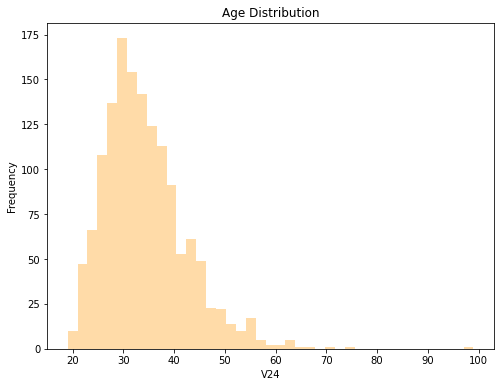

In [16]:
fig,ax = plt.subplots(figsize=(8, 6))
sns.distplot(train_df['V24'].dropna(),ax=ax, kde=False, color='#ffa726')
plt.title('Age Distribution')
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Age Group vs Treatment')

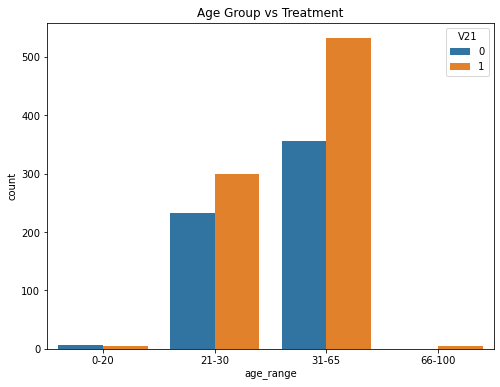

In [17]:
#Age group vs Treatment
fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data = train_df, x = 'age_range', hue='V21')
plt.title('Age Group vs Treatment')

In [18]:
orig_mental_health_dataset = train_df.copy()

def understand_variables(dataset):
    print("Type = " +str(type(dataset))+"\n")
    print("Shape = "+str(dataset.shape)+"\n")
    print("Head : \n\n"+str(dataset.head())+"\n\n")
    print(str(dataset.info())+"\n\n")
    print("No.of unique values :\n\n"+str(dataset.nunique(axis=0))+"\n\n")
    print("Description :\n\n"+str(dataset.describe())+"\n\n")
    
    #print(dataset.describe(exclude=[np.number]))
    #Since no categorical variables, no need to have the above line
    
    print("Null count :\n\n"+str(dataset.isnull().sum()))
    
understand_variables(train_df)

Type = <class 'pandas.core.frame.DataFrame'>

Shape = (1433, 29)

Head : 

   V1      V2  V3  V4            V5   V6   V7            V8  \
0   0  1 to 5   1   0           Yes  Yes   No            No   
1   0  1 to 5   1   0            No   No   No  I don't know   
2   0  1 to 5   1   0           Yes  Yes   No  I don't know   
3   0  1 to 5   1   0            No   No   No            No   
4   0  1 to 5   0   1  I don't know   No  Yes            No   

                   V9    V10  ...  \
0  Somewhat difficult  Maybe  ...   
1           Very easy    Yes  ...   
2        I don't know  Maybe  ...   
3      Very difficult     No  ...   
4      Very difficult    Yes  ...   

                                                 V20 V21  \
0  Mood Disorder (Depression, Bipolar Disorder, e...   1   
1  Mood Disorder (Depression, Bipolar Disorder, etc)   1   
2                                                NaN   0   
3                                                NaN   0   
4                      

In [19]:
def understand_dist(dataset,feature_type):
    
    if feature_type == "Categorical":
        
        categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']   
        dataframes=[]
        for feature in categorical_features:
            dataframe=dataset[feature].value_counts().rename_axis(feature).reset_index(name='counts')
            dataframes.append(dataframe)
            
            plt.figure(figsize=(10,4))
            sns.countplot(x=feature,data = dataset)
            plt.show()
            print(dataframe,'\n')

        #for i in range(len(dataframes)):
        #    print(dataframes[i],'\n')
            
        
            
    elif feature_type == "Numeric":
        
        numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']
        
        for feature in numerical_features:
            plt.figure(figsize=(10,4))
            sns.distplot(dataset[feature])
            plt.show()
            
            print("Description :\n\n"+str(dataset[feature].describe())+"\n\n")

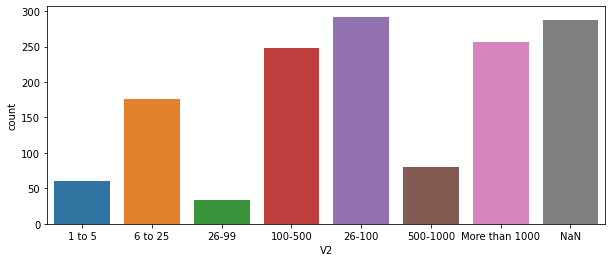

               V2  counts
0          26-100     292
1             NaN     287
2  More than 1000     256
3         100-500     248
4         6 to 25     176
5        500-1000      80
6          1 to 5      60
7           26-99      34 



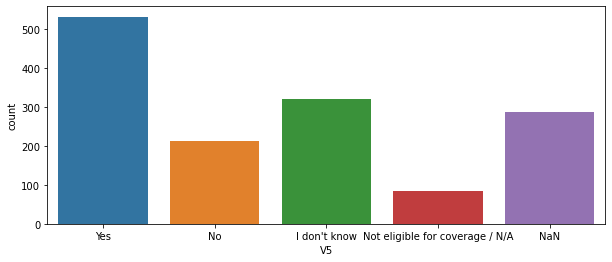

                                V5  counts
0                              Yes     531
1                     I don't know     319
2                              NaN     287
3                               No     213
4  Not eligible for coverage / N/A      83 



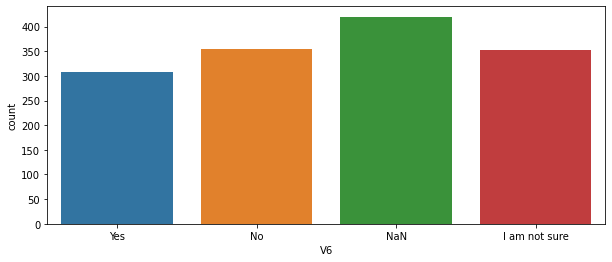

              V6  counts
0            NaN     420
1             No     354
2  I am not sure     352
3            Yes     307 



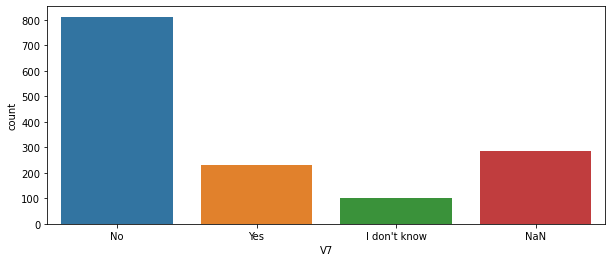

             V7  counts
0            No     813
1           NaN     287
2           Yes     230
3  I don't know     103 



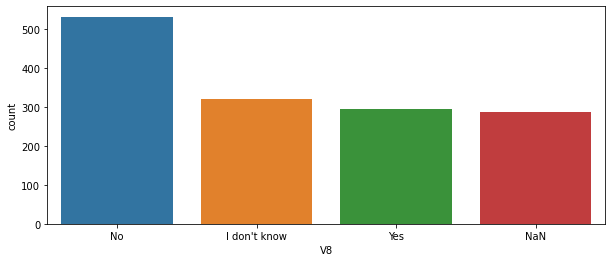

             V8  counts
0            No     531
1  I don't know     320
2           Yes     295
3           NaN     287 



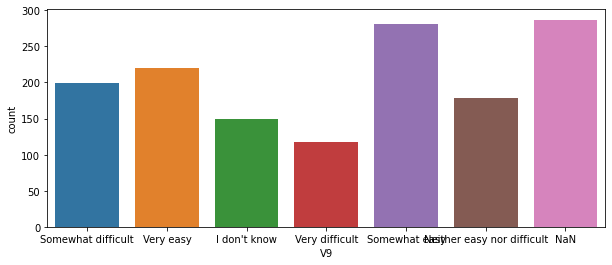

                           V9  counts
0                         NaN     287
1               Somewhat easy     281
2                   Very easy     220
3          Somewhat difficult     199
4  Neither easy nor difficult     178
5                I don't know     150
6              Very difficult     118 



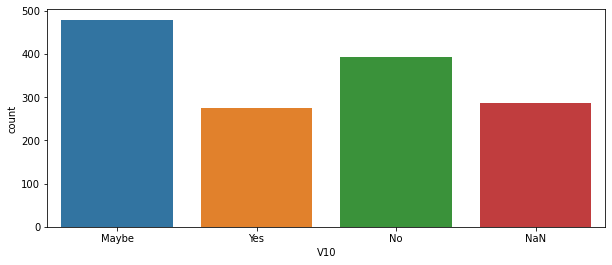

     V10  counts
0  Maybe     479
1     No     392
2    NaN     287
3    Yes     275 



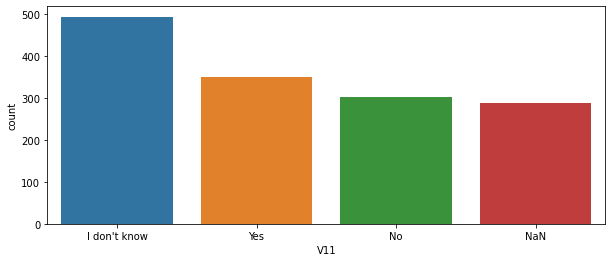

            V11  counts
0  I don't know     493
1           Yes     350
2            No     303
3           NaN     287 



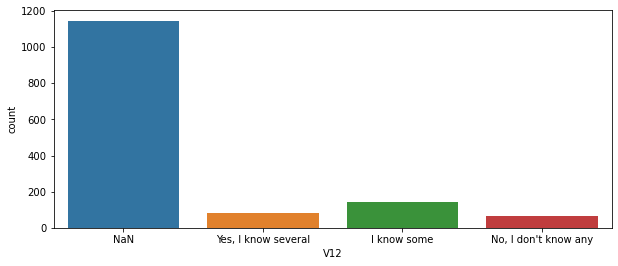

                    V12  counts
0                   NaN    1146
1           I know some     141
2   Yes, I know several      83
3  No, I don't know any      63 



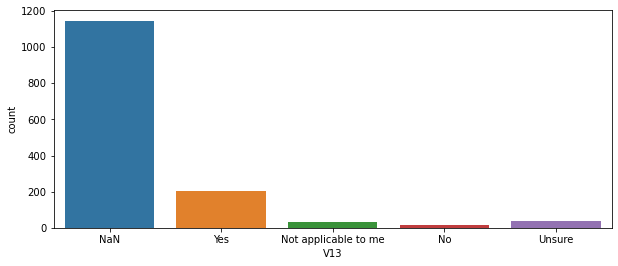

                    V13  counts
0                   NaN    1146
1                   Yes     204
2                Unsure      38
3  Not applicable to me      31
4                    No      14 



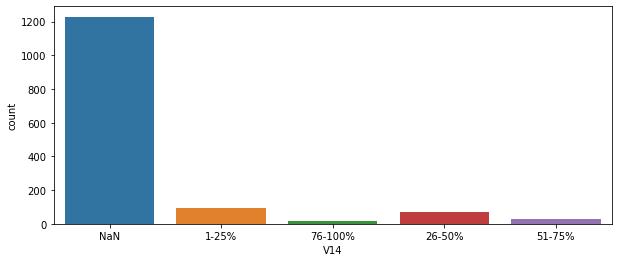

       V14  counts
0      NaN    1229
1    1-25%      92
2   26-50%      72
3   51-75%      26
4  76-100%      14 



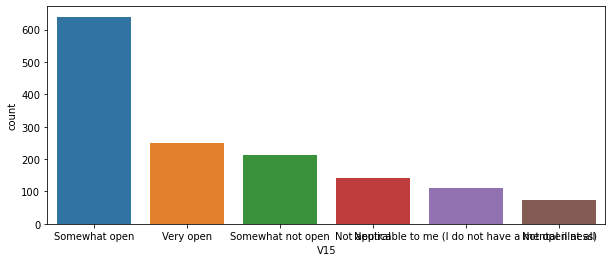

                                                 V15  counts
0                                      Somewhat open     640
1                                          Very open     251
2                                  Somewhat not open     214
3                                            Neutral     141
4  Not applicable to me (I do not have a mental i...     112
5                                    Not open at all      75 



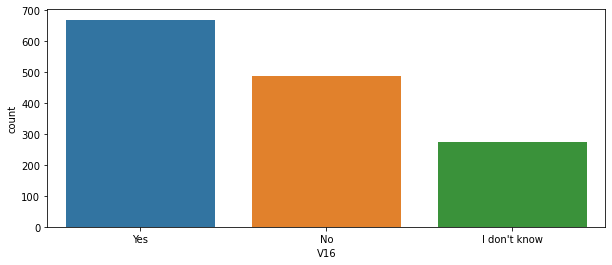

            V16  counts
0           Yes     670
1            No     488
2  I don't know     275 



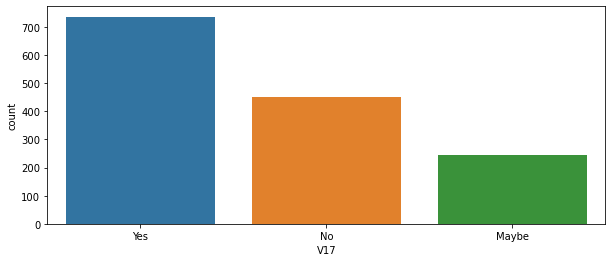

     V17  counts
0    Yes     736
1     No     451
2  Maybe     246 



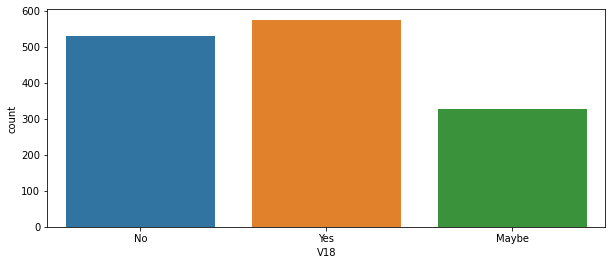

     V18  counts
0    Yes     575
1     No     531
2  Maybe     327 



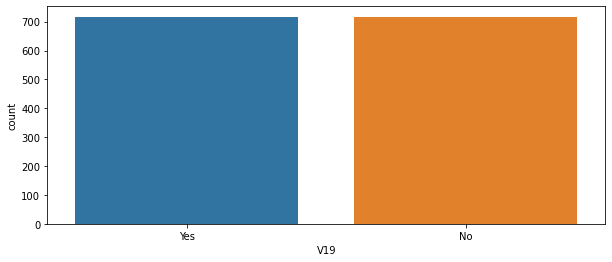

   V19  counts
0   No     717
1  Yes     716 



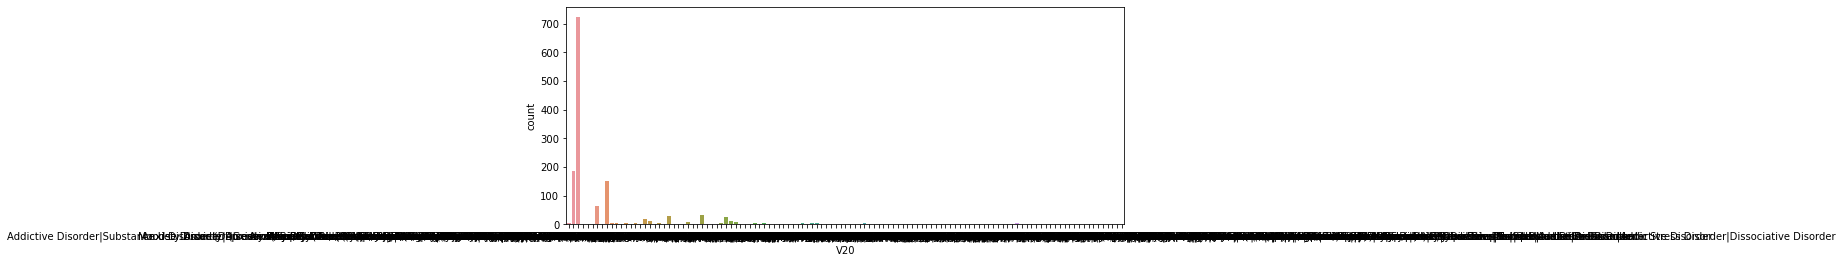

                                                   V20  counts
0                                                  NaN     722
1    Mood Disorder (Depression, Bipolar Disorder, etc)     187
2    Anxiety Disorder (Generalized, Social, Phobia,...     150
3    Anxiety Disorder (Generalized, Social, Phobia,...      64
4    Anxiety Disorder (Generalized, Social, Phobia,...      33
..                                                 ...     ...
112  Anxiety Disorder (Generalized, Social, Phobia,...       1
113  Anxiety Disorder (Generalized, Social, Phobia,...       1
114  Mood Disorder (Depression, Bipolar Disorder, e...       1
115                            ADD (w/o Hyperactivity)       1
116  Anxiety Disorder (Generalized, Social, Phobia,...       1

[117 rows x 2 columns] 



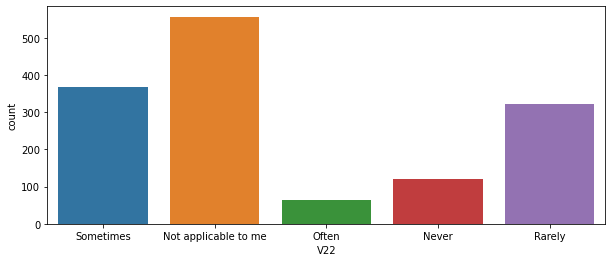

                    V22  counts
0  Not applicable to me     557
1             Sometimes     369
2                Rarely     322
3                 Never     120
4                 Often      65 



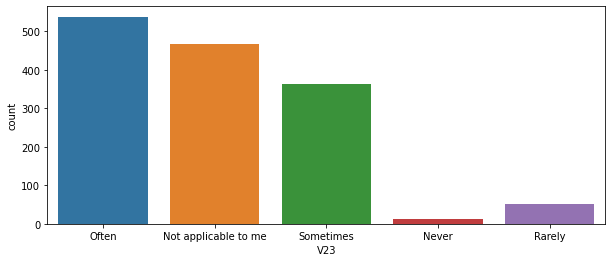

                    V23  counts
0                 Often     538
1  Not applicable to me     468
2             Sometimes     363
3                Rarely      52
4                 Never      12 



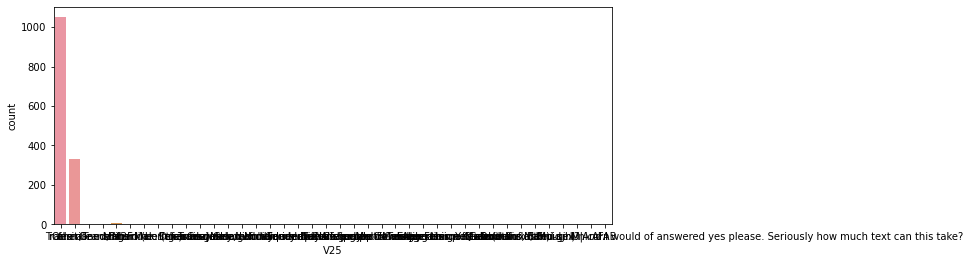

                                                  V25  counts
0                                                male    1050
1                                              female     332
2                                               trans       9
3                                                 NaN       3
4                                          Male (cis)       2
5                                             Agender       2
6                                           Nonbinary       2
7                                   Transitioned, M2F       1
8                           Genderfluid (born female)       1
9                                           Cis-woman       1
10                                              Queer       1
11                                  genderqueer woman       1
12  I'm a man why didn't you make this a drop down...       1
13                                                 M|       1
14                                Other/Transfeminine       1
15      

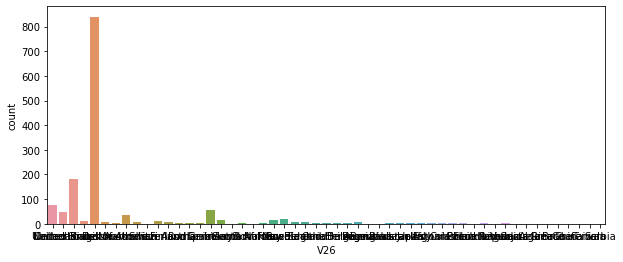

                         V26  counts
0   United States of America     840
1             United Kingdom     180
2                     Canada      78
3                    Germany      58
4                Netherlands      48
5                  Australia      35
6                     Sweden      19
7                     France      16
8                    Ireland      15
9                Switzerland      10
10                    Brazil      10
11                     India       9
12                    Russia       9
13               New Zealand       9
14                  Bulgaria       7
15                   Denmark       7
16                   Finland       7
17                     Italy       5
18                   Belgium       5
19              South Africa       4
20                    Poland       4
21                   Romania       4
22                     Spain       4
23                   Austria       4
24                    Norway       3
25                  Pakistan       3
2

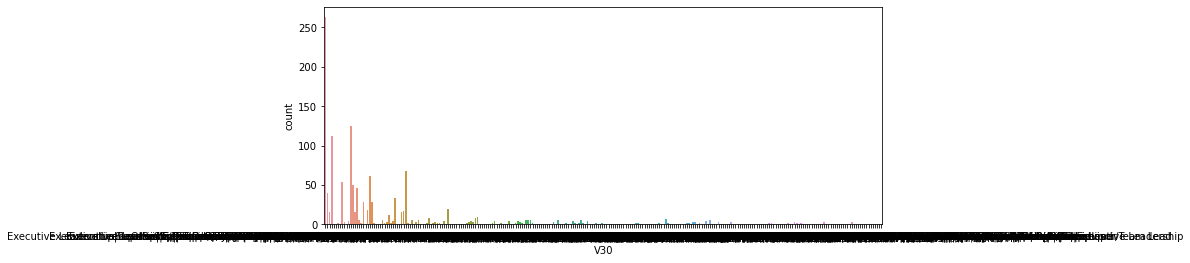

                                                   V30  counts
0                                   Back-end Developer     263
1                                  Front-end Developer     125
2                                                Other     112
3                                 Supervisor/Team Lead      68
4               Back-end Developer|Front-end Developer      61
..                                                 ...     ...
259  Supervisor/Team Lead|Back-end Developer|Front-...       1
260  One-person shop|Designer|Front-end Developer|B...       1
261  Dev Evangelist/Advocate|DevOps/SysAdmin|Suppor...       1
262  Executive Leadership|DevOps/SysAdmin|Back-end ...       1
263  Supervisor/Team Lead|Support|One-person shop|D...       1

[264 rows x 2 columns] 



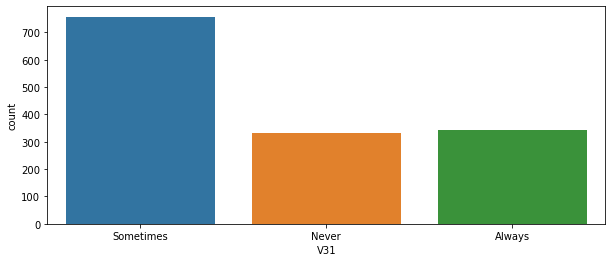

         V31  counts
0  Sometimes     757
1     Always     343
2      Never     333 



In [20]:
understand_dist(train_df,"Categorical")

# 3. Encoding Data 😎

In [21]:
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
train_df = train_df.drop(['V26'], axis= 1)
train_df.head()

label_V1 [0, 1]
label_V2 ['1 to 5', '100-500', '26-100', '26-99', '500-1000', '6 to 25', 'More than 1000', 'NaN']
label_V3 [0, 1]
label_V4 [0, 1]
label_V5 ["I don't know", 'NaN', 'No', 'Not eligible for coverage / N/A', 'Yes']
label_V6 ['I am not sure', 'NaN', 'No', 'Yes']
label_V7 ["I don't know", 'NaN', 'No', 'Yes']
label_V8 ["I don't know", 'NaN', 'No', 'Yes']
label_V9 ["I don't know", 'NaN', 'Neither easy nor difficult', 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_V10 ['Maybe', 'NaN', 'No', 'Yes']
label_V11 ["I don't know", 'NaN', 'No', 'Yes']
label_V12 ['I know some', 'NaN', "No, I don't know any", 'Yes, I know several']
label_V13 ['NaN', 'No', 'Not applicable to me', 'Unsure', 'Yes']
label_V14 ['1-25%', '26-50%', '51-75%', '76-100%', 'NaN']
label_V15 ['Neutral', 'Not applicable to me (I do not have a mental illness)', 'Not open at all', 'Somewhat not open', 'Somewhat open', 'Very open']
label_V16 ["I don't know", 'No', 'Yes']
label_V17 ['Maybe', 'N

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V30,V31,age_range
0,0,0,1,0,4,3,2,2,3,0,...,1,76,1,4,2,14,38,0,2,2
1,0,0,1,0,2,2,2,0,6,3,...,1,68,1,1,1,21,38,96,2,2
2,0,0,1,0,4,3,2,0,0,0,...,0,95,0,1,1,2,38,3,1,1
3,0,0,1,0,2,2,2,2,5,2,...,0,95,0,2,2,17,38,0,1,2
4,0,0,0,1,0,2,3,2,5,3,...,0,95,1,1,2,17,35,162,2,2


In [22]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

           Total  Percent
age_range      0      0.0
V31            0      0.0
V2             0      0.0
V3             0      0.0
V4             0      0.0
V5             0      0.0
V6             0      0.0
V7             0      0.0
V8             0      0.0
V9             0      0.0
V10            0      0.0
V11            0      0.0
V12            0      0.0
V13            0      0.0
V14            0      0.0
V15            0      0.0
V16            0      0.0
V17            0      0.0
V18            0      0.0
V19            0      0.0
V20            0      0.0
V21            0      0.0
V22            0      0.0
V23            0      0.0
V24            0      0.0
V25            0      0.0
V30            0      0.0
V1             0      0.0


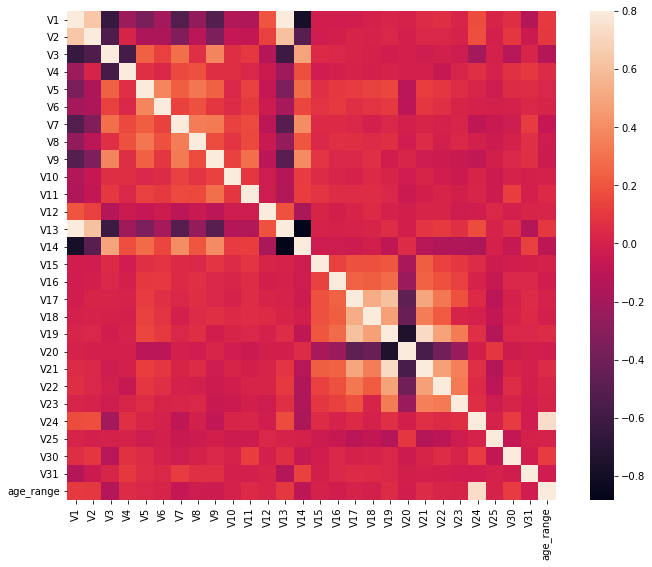

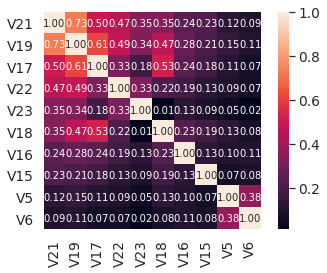

In [23]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
#TREATMENT HEATMAT
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'V21')['V21'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 4. Scaling 👾


In [24]:
scaler = MinMaxScaler()
train_df['V24'] = scaler.fit_transform(train_df[['V24']])
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V30,V31,age_range
0,0,0,1,0,4,3,2,2,3,0,...,1,76,1,4,2,0.291667,38,0,2,2
1,0,0,1,0,2,2,2,0,6,3,...,1,68,1,1,1,0.437500,38,96,2,2
2,0,0,1,0,4,3,2,0,0,0,...,0,95,0,1,1,0.041667,38,3,1,1
3,0,0,1,0,2,2,2,2,5,2,...,0,95,0,2,2,0.354167,38,0,1,2
4,0,0,0,1,0,2,3,2,5,3,...,0,95,1,1,2,0.354167,35,162,2,2


In [25]:
#SPLIT

# define X and y
feature_cols = ['V24', 'V25','V15', 'V16', 'V5', 'V6', 'V22','V23', 'V9', 'V10','V17', 'V18','V19','V31'  ]
X = train_df[feature_cols]
y = train_df.V21

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

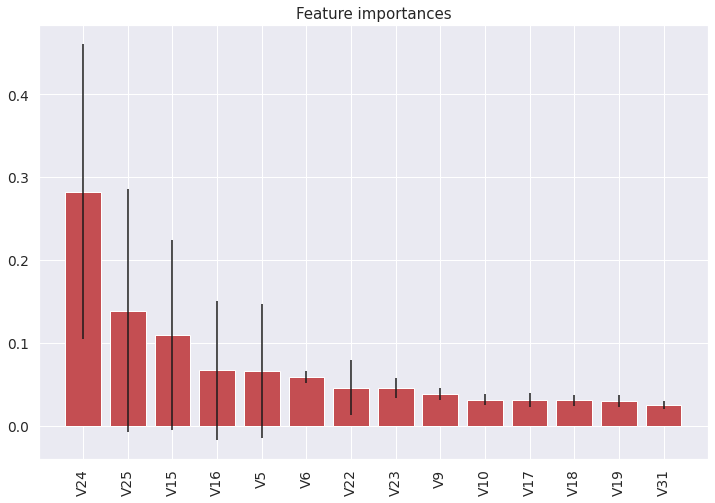

In [26]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

# 5. Tuning ⚙️ 

In [27]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:\n', y_test.value_counts())
    print('Percentage of ones:', y_test.mean())  
    print('Percentage of zeros:',1 - y_test.mean())
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])
    model.predict_proba(X_test)[0:10, 1]
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:

        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')

    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    def evaluate_threshold(threshold):
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

In [28]:
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [29]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.cv_results_
    
    # examine the first tuple
    print(grid.cv_results_[0].parameters)
    print(grid.cv_results_[0].cv_validation_scores)
    print(grid.cv_results_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.cv_results_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [30]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

# 6. Models 🧠

## 6.1 Logistic Regression

In [31]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


########### Logistic Regression ###############
Accuracy: 0.858139534883721
Null accuracy:
 1    250
0    180
Name: V21, dtype: int64
Percentage of ones: 0.5813953488372093
Percentage of zeros: 0.41860465116279066
True: [1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1]
Pred: [1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1]


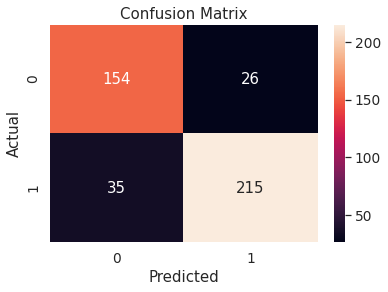

Classification Accuracy: 0.858139534883721
Classification Error: 0.14186046511627903
False Positive Rate: 0.14444444444444443
Precision: 0.8921161825726142
AUC Score: 0.8577777777777778


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-validated AUC: 0.9098941326241204
First 10 predicted responses:
 [1 1 1 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.10219779 0.89780221]
 [0.03314064 0.96685936]
 [0.01514787 0.98485213]
 [0.76158942 0.23841058]
 [0.01795042 0.98204958]
 [0.01383698 0.98616302]
 [0.84800309 0.15199691]
 [0.08835939 0.91164061]
 [0.10044672 0.89955328]
 [0.0952585  0.9047415 ]]
First 10 predicted probabilities:
 [[0.89780221]
 [0.96685936]
 [0.98485213]
 [0.23841058]
 [0.98204958]
 [0.98616302]
 [0.15199691]
 [0.91164061]
 [0.89955328]
 [0.9047415 ]]


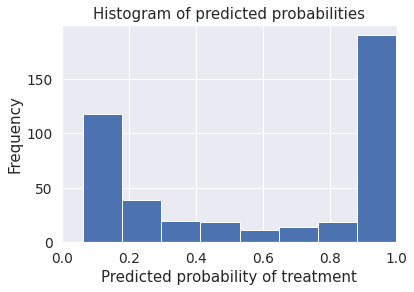

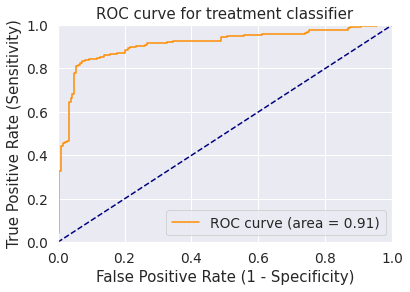

[[154  26]
 [ 35 215]]


In [32]:
logisticRegression()

## 6.2 KNN

In [33]:
def Knn():
    knn = KNeighborsClassifier(n_neighbors=5)
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

Rand. Best Score:  0.827666083916084
Rand. Best Params:  {'weights': 'distance', 'n_neighbors': 12}
[0.825, 0.828, 0.828, 0.828, 0.828, 0.827, 0.826, 0.83, 0.829, 0.83, 0.83, 0.828, 0.826, 0.826, 0.827, 0.826, 0.83, 0.828, 0.828, 0.828]
########### KNeighborsClassifier ###############
Accuracy: 0.7976744186046512
Null accuracy:
 1    250
0    180
Name: V21, dtype: int64
Percentage of ones: 0.5813953488372093
Percentage of zeros: 0.41860465116279066
True: [1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1]
Pred: [0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1]


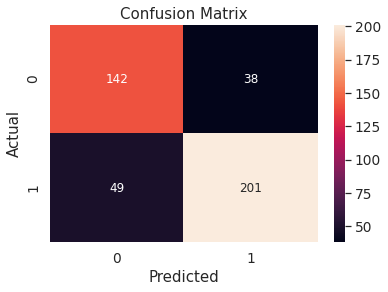

Classification Accuracy: 0.7976744186046512
Classification Error: 0.20232558139534884
False Positive Rate: 0.2111111111111111
Precision: 0.8410041841004184
AUC Score: 0.7964444444444444
Cross-validated AUC: 0.8845305110676767
First 10 predicted responses:
 [0 1 1 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.62962963 0.37037037]
 [0.03703704 0.96296296]
 [0.         1.        ]
 [0.77777778 0.22222222]
 [0.22222222 0.77777778]
 [0.03703704 0.96296296]
 [0.85185185 0.14814815]
 [0.07407407 0.92592593]
 [0.40740741 0.59259259]
 [0.2962963  0.7037037 ]]
First 10 predicted probabilities:
 [[0.37037037]
 [0.96296296]
 [1.        ]
 [0.22222222]
 [0.77777778]
 [0.96296296]
 [0.14814815]
 [0.92592593]
 [0.59259259]
 [0.7037037 ]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


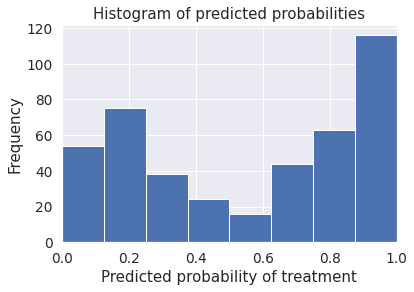

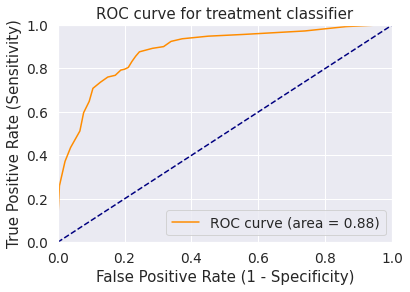

[[142  38]
 [ 49 201]]


In [34]:
Knn()

## 6.3 Random Forest

In [35]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

Rand. Best Score:  0.8750825563325563
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}
[0.872, 0.87, 0.87, 0.87, 0.869, 0.871, 0.874, 0.872, 0.87, 0.867, 0.871, 0.87, 0.87, 0.873, 0.87, 0.87, 0.872, 0.871, 0.87, 0.87]
########### Random Forests ###############
Accuracy: 0.8627906976744186
Null accuracy:
 1    250
0    180
Name: V21, dtype: int64
Percentage of ones: 0.5813953488372093
Percentage of zeros: 0.41860465116279066
True: [1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1]
Pred: [1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1]


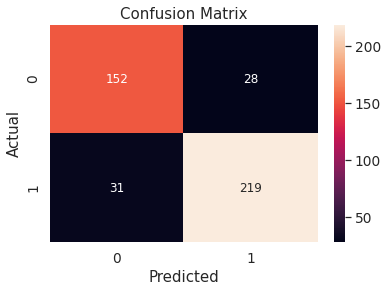

Classification Accuracy: 0.8627906976744186
Classification Error: 0.13720930232558137
False Positive Rate: 0.15555555555555556
Precision: 0.8866396761133604
AUC Score: 0.8602222222222222
Cross-validated AUC: 0.9352642328798648
First 10 predicted responses:
 [1 1 1 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.17284867 0.82715133]
 [0.0534695  0.9465305 ]
 [0.04490615 0.95509385]
 [0.66886969 0.33113031]
 [0.08444276 0.91555724]
 [0.04050383 0.95949617]
 [0.89889525 0.10110475]
 [0.04782053 0.95217947]
 [0.01371499 0.98628501]
 [0.09986442 0.90013558]]
First 10 predicted probabilities:
 [[0.82715133]
 [0.9465305 ]
 [0.95509385]
 [0.33113031]
 [0.91555724]
 [0.95949617]
 [0.10110475]
 [0.95217947]
 [0.98628501]
 [0.90013558]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


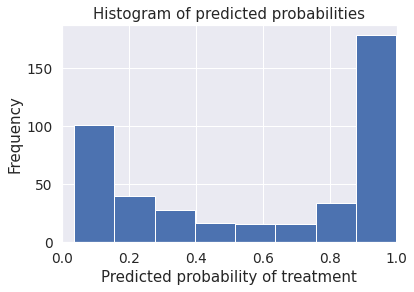

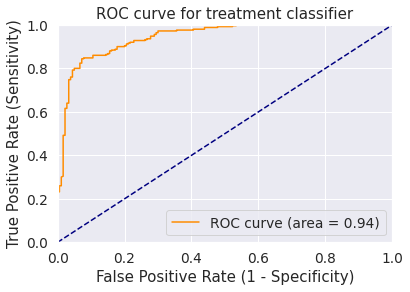

[[152  28]
 [ 31 219]]


In [36]:
randomForest()

## 6.4 Decision Tree classifier

In [37]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

Rand. Best Score:  0.8645979020979022
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 8}
[0.858, 0.864, 0.858, 0.864, 0.863, 0.864, 0.868, 0.866, 0.863, 0.86, 0.862, 0.862, 0.863, 0.862, 0.861, 0.861, 0.864, 0.861, 0.872, 0.864]
########### Tree classifier ###############
Accuracy: 0.8441860465116279
Null accuracy:
 1    250
0    180
Name: V21, dtype: int64
Percentage of ones: 0.5813953488372093
Percentage of zeros: 0.41860465116279066
True: [1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1]
Pred: [1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1]


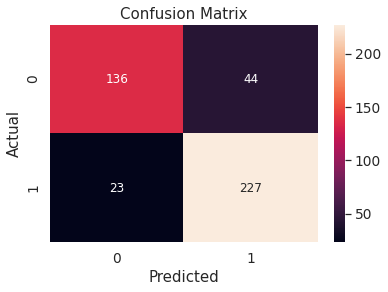

Classification Accuracy: 0.8441860465116279
Classification Error: 0.15581395348837213
False Positive Rate: 0.24444444444444444
Precision: 0.8376383763837638
AUC Score: 0.8317777777777777
Cross-validated AUC: 0.9073416284184356
First 10 predicted responses:
 [1 1 1 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.17241379 0.82758621]
 [0.04984424 0.95015576]
 [0.04984424 0.95015576]
 [0.87228261 0.12771739]
 [0.04984424 0.95015576]
 [0.04984424 0.95015576]
 [0.87228261 0.12771739]
 [0.04984424 0.95015576]
 [0.04984424 0.95015576]
 [0.04984424 0.95015576]]
First 10 predicted probabilities:
 [[0.82758621]
 [0.95015576]
 [0.95015576]
 [0.12771739]
 [0.95015576]
 [0.95015576]
 [0.12771739]
 [0.95015576]
 [0.95015576]
 [0.95015576]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


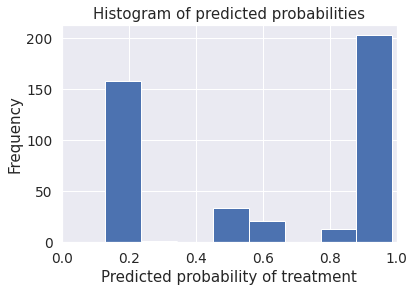

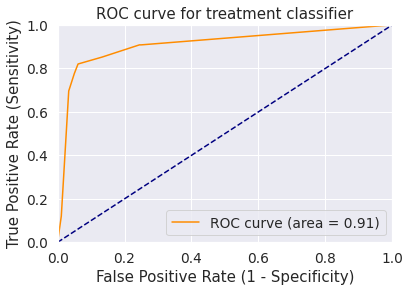

[[136  44]
 [ 23 227]]


In [38]:
treeClassifier()

## 6.5 Neural Networks

In [39]:
import tensorflow as tf
import argparse
from sklearn.model_selection import train_test_split,cross_val_score


batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

In [40]:
#['V24', 'V25','V15', 'V16', 'V5', 'V6', 'V22','V23', 'V9', 'V10','V17', 'V18','V19','V31'  ]
V24 = tf.feature_column.numeric_column("V24")
V25 = tf.feature_column.numeric_column("V25")
V16 = tf.feature_column.numeric_column("V16")
V15 = tf.feature_column.numeric_column("V15")
V5 = tf.feature_column.numeric_column("V5")
V6 = tf.feature_column.numeric_column("V6")
V22 = tf.feature_column.numeric_column("V22")
V23 = tf.feature_column.numeric_column("V23")
V9 = tf.feature_column.numeric_column("V9")
V10 = tf.feature_column.numeric_column("V10")
V17 = tf.feature_column.numeric_column("V17")
V19 = tf.feature_column.numeric_column("V19")
V18 = tf.feature_column.numeric_column("V18")
V31 = tf.feature_column.numeric_column("V31")
feature_columns = [V24, V25,V15,V16,V5,V6,V22,V23,V9,V10,V17,V18,V19,V31]

In [41]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(4, activation='relu', input_shape=[14]),
layers.Dense(4, activation='relu'),
layers.Dense(1, activation='sigmoid'),
])

In [42]:
model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['binary_accuracy'],
)

In [43]:
early_stopping = keras.callbacks.EarlyStopping(
patience=5,
min_delta=0.001,
restore_best_weights=True,
)
history = model.fit(
X_train, y_train,
validation_data=(X_test, y_test),
batch_size=1000,
epochs=1000,
verbose=1,
)

Epoch 1/1000
2/2 [==============================] - 0s 97ms/step - loss: 2.9390 - binary_accuracy: 0.5872 - val_loss: 2.8939 - val_binary_accuracy: 0.5814
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.8601 - binary_accuracy: 0.5872 - val_loss: 2.8192 - val_binary_accuracy: 0.5814
Epoch 3/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.7865 - binary_accuracy: 0.5872 - val_loss: 2.7499 - val_binary_accuracy: 0.5814
Epoch 4/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.7182 - binary_accuracy: 0.5872 - val_loss: 2.6871 - val_binary_accuracy: 0.5814
Epoch 5/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.6565 - binary_accuracy: 0.5872 - val_loss: 2.6309 - val_binary_accuracy: 0.5814
Epoch 6/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.6010 - binary_accuracy: 0.5872 - val_loss: 2.5740 - val_binary_accuracy: 0.5814
Epoch 7/1000
2/2 [==============================] - 0s 10ms/step - los

Best Validation Loss: 0.3936
Best Validation Accuracy: 0.8465


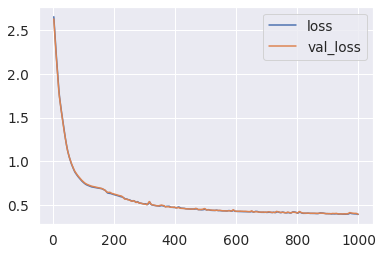

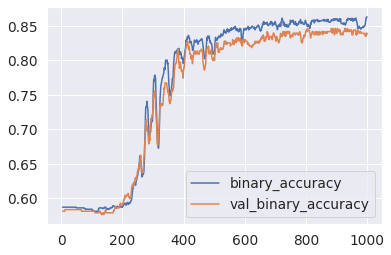

In [44]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 4
history_df.loc[4:, ['loss', 'val_loss']].plot()
history_df.loc[4:, ['binary_accuracy', 'val_binary_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
"\nBest Validation Accuracy: {:0.4f}")\
.format(history_df['val_loss'].min(),
history_df['val_binary_accuracy'].max()))

In [45]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Dropout, AlphaDropout, BatchNormalization,Concatenate, concatenate
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax, Adagrad, Adam, Nadam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import *

In [46]:
metrics = ['accuracy', 
           Precision(),
           Recall()]
def create_model():
    model = Sequential()
    model.add(Input(shape=X_train.shape[1], name='Input_'))
    model.add(Dense(8, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.00001)))
    model.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.0001)))
    model.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.001)))
    model.add(Dense(64, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.1)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.1)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

    model.summary()
    optimize = Adam(lr = 0.0001)
    model.compile(optimizer = optimize, 
                       loss = 'binary_crossentropy', 
                       metrics = metrics)
    return model

In [47]:
estimator = KerasClassifier(build_fn = create_model, epochs = 1000, batch_size = 100, verbose = 1)
kfold = StratifiedKFold(n_splits = 3)
results = cross_val_score(estimator, X_train, y_train, cv = kfold)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)               

In [48]:
train_history = estimator.fit(X_train, y_train, epochs = 1000, batch_size = 100)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_24 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)               

## 6.6 XGBoost

In [49]:
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [50]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))
methodDict['XGBoost'] = acc_xgb * 100

XGBoost's prediction accuracy is: 85.12
Time consumed for training: 0.093
Time consumed for prediction: 0.00619 seconds


In [51]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.85148515 0.85148515 0.84158416 0.9        0.83       0.91
 0.82       0.83       0.87       0.9       ]
Mean: 0.8604554455445544
Standard Deviation: 0.031116031730348524


## Exporting the model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [53]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Accuracy: ", log_reg.score(X_test,y_test))

Accuracy:  0.858139534883721


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
knn_clsf = KNeighborsClassifier(n_neighbors=8)
knn_clsf.fit(X_train, y_train)
print("Accuracy: ", knn_clsf.score(X_test,y_test))

Accuracy:  0.8069767441860465


In [55]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(X_train, y_train)
print("Accuracy: ", rf_reg.score(X_test,y_test))

Accuracy:  0.8697674418604651


In [56]:
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
print("Accuracy: ", svm_clsf.score(X_test,y_test))

Accuracy:  0.8209302325581396


In [57]:
voting_classfication = VotingClassifier(estimators = [('knn', knn_clsf),('lg',log_reg), ('rfg', rf_reg), ('svc', svm_clsf)], voting="hard", n_jobs=-1)
voting_classfication.fit(X_train, y_train)
print("Accuracy: ", voting_classfication.score(X_test,y_test))

Accuracy:  0.8302325581395349


In [58]:
import pickle
Pkl_Filename = "Modelimp.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(voting_classfication, file)

    # some time later...
# load the model from disk

with open(Pkl_Filename, 'rb') as file:
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('lg', LogisticRegression(random_state=42)),
                             ('rfg', RandomForestClassifier(random_state=42)),
                             ('svc', SVC())],
                 n_jobs=-1)

## Well, this seems like the end to this notebook. 😱



## ✌️ Please Upvote if you found it useful. It will help me edge further towards my goal of becoming a Data Scientist. ✌️